In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv("Mobile_data.csv")

In [ ]:
df

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19,0
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16,2
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5,3
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


In [ ]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [ ]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

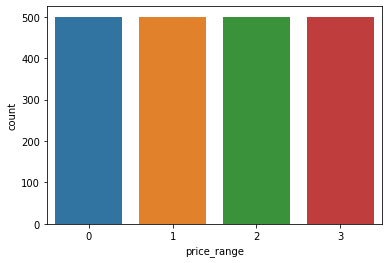

In [ ]:
sns.countplot(df['price_range'])

In [ ]:
corr=df.corr()

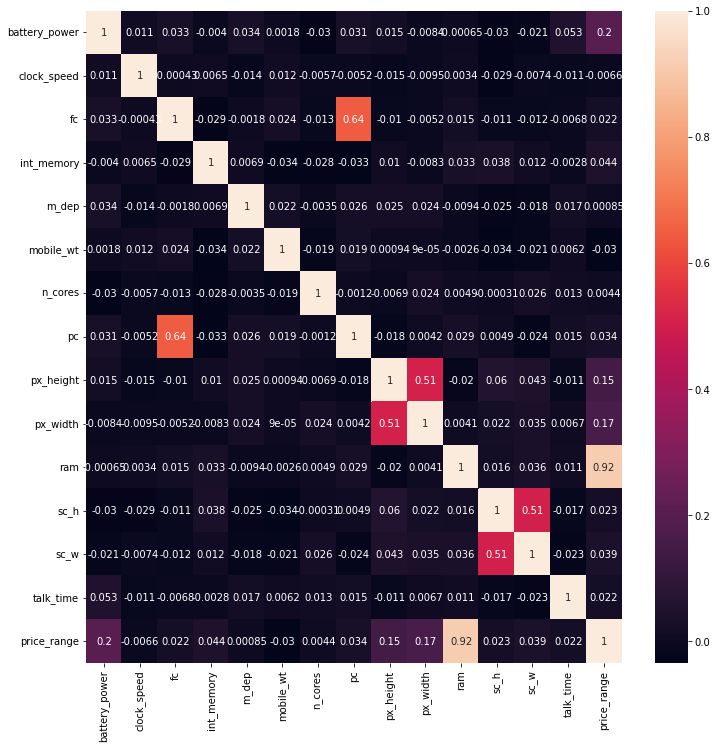

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

# Finding Highly Correlated fratues with target Variable

In [ ]:
high_corr_feature=corr.index[abs(corr['price_range'])>0.5]

In [ ]:
high_corr_feature

Index(['ram', 'price_range'], dtype='object')

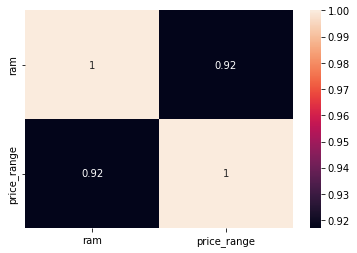

In [ ]:
sns.heatmap(data=df[high_corr_feature].corr(),annot=True)

# Splitting data into train and test data

In [ ]:
X=df.drop(['price_range'],axis=1)
y=df['price_range']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [ ]:
X_train.shape

(1600, 14)

In [ ]:
X_test.shape

(400, 14)

In [ ]:
y_train.shape

(1600,)

In [ ]:
y_test.shape

(400,)

#Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf=KNeighborsClassifier(n_neighbors=5,)
clf.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
param_grid={"n_neighbors":[2,4,5,7,9],
          'metric':['euclidean','minkowski','manhattan'],
          'weights':['uniform','distance']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
model=GridSearchCV(clf,param_grid,cv=3,n_jobs=-1,scoring="accuracy")
model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'minkowski', 'manhattan'],
                         'n_neighbors': [2, 4, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
model.best_params_

{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}

In [ ]:
model.best_score_

0.9349979973438455

In [ ]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [ ]:
print("Train Data")
print(accuracy_score(y_train,y_train_pred))
print("Test Data")
print(accuracy_score(y_test,y_test_pred))

Train Data
1.0
Test Data
0.9275


In [ ]:
clf1=KNeighborsClassifier(metric='euclidean', n_neighbors= 9,weights='distance')
clf1.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')

In [ ]:
y_train_pred=clf1.predict(X_train)
y_test_pred=clf1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Train Data")
print(accuracy_score(y_train,y_train_pred))
print("Test Data")
print(accuracy_score(y_test,y_test_pred))

Train Data
1.0
Test Data
0.9275
